#New York AirBnB
With the new ban on AirBnB in NYC, now is a good time to evaluate the impact this platform has on the city.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip "/content/gdrive/My Drive/airbnb.zip"

Archive:  /content/gdrive/My Drive/airbnb.zip
replace airbnb-listings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace airbnb-listings.geojson? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df1 = pd.read_csv("airbnb-listings.csv", sep=';')

<ipython-input-6-65c1d76a9dbd>:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("airbnb-listings.csv", sep=';')


In [7]:
df1.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,Perfect location to enjoy Amsterdam's famous e...,NaN,NaN,NaN,I expect you to treat my beloved apartment as ...,https://a0.muscache.com/im/pictures/f3940538-4...,https://a0.muscache.com/im/pictures/f3940538-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/f3940538-4...,20786453,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",Hi there! As I love to travel myself I know ho...,within a day,50.0,NaN,https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,Oud-West,1.0,1.0,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.365237,4.878250,Apartment,Entire home/apt,6.0,1.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,600.0,NaN,6000.0,500.0,50.0,4.0,50.0,2.0,1125.0,3 weeks ago,NaN,14.0,44.0,74.0,74.0,2017-04-02,31.0,2015-08-02,2016-11-27,89.0,9.0,8.0,9.0,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,NaN,Public transport is very close - 100 meters,NaN,You'll have the apartment for yourselves,no smoking inside no pets no load music after ...,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,11964927,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",I live together with my girlfriend in our apar...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,Oud-West,1.0,1.0,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.367309,4.873841,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,175.0,NaN,4000.0,400.0,40.0,2.0,30.0,2.0,112

In [8]:
df1.tail()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
494949,12856943,https://www.airbnb.com/rooms/12856943,20170403112154,2017-04-03,"Two rooms available, one double bed, one queen","The first room is large, and has a Queen bed, ...",NaN,"The first room is large, and has a Queen bed, ...",none,NaN,NaN,NaN,NaN,NaN,Please do the dishes within a reasonable amoun...,https://a0.muscache.com/im/pictures/141cbff9-a...,https://a0.muscache.com/im/pictures/141cbff9-a...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/141cbff9-a...,69876337,https://www.airbnb.com/users/show/69876337,James,2016-05-01,"Footscray, Victoria, Australia",I am starting a small industrial design busine...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/1c49a1f7-2...,https://a0.muscache.com/im/pictures/1c49a1f7-2...,Footscray,2.0,2.0,"email,phone,reviews","Footscray, Footscray, VIC 3011, Australia",Footscray,Maribyrnong,NaN,Footscray,VIC,3011,Melbourne,"Footscray, Australia",AU,Australia,-37.796844,144.882124,House,Private room,2.0,1.5,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Free par...",NaN,30.0,NaN,NaN,NaN,NaN,1.0,12.0,1.0,1125.0,7 months ago,NaN,0.0,0.0,0.0,0.0,2017-04-03,4.0,2016-05-30,2016-08-09,60.0,7.0,4.0,9.0,9.0,8.0,6.0,NaN,NaN,moderate,2.0,0.39,"-37.79684352249112, 144.88212384345277","Host Has Profile Pic,Is Location Exact"
494950,4567157,https://www.airbnb.com/rooms/4567157,20170403112154,2017-04-03,Sunny room in gorgeous Yarraville,"Bright, friendly, cosy home. Close to CDB trai...",I hope that you will make yourself comfortable...,"Bright, friendly, cosy home. Close to CDB trai...",none,"Yarraville is close to the city, markets, cafe...",I have spare Myki (public transport) cards for...,There a bus stop 1 minute away and Yarraville ...,You'll have access to the whole house includin...,As much as you like! I love meeting people but...,"Basically no parties, public nudity, sleepover...",https://a0.muscache.com/im/pictures/67169938/d...,https://a0.muscache.com/im/pictures/67169938/d...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/67169938/d...,11281861,https://www.airbnb.com/users/show/11281861,Nicole,2014-01-14,"Yarraville, Victoria, Australia","Hello,\r\n\r\nI'm a nice, easygoing female in ...",within a few hours,100.0,NaN,https://a0.muscache.com/im/users/11281861/prof...,https://a0.muscache.com/im/users/11281861/prof...,Yarraville/Seddon,1.0,1.0,"email,phone,reviews,jumio","Yarraville/Seddon, Yarraville, VIC 3013, Austr...",Yarraville/Seddon,Maribyrnong,NaN,Yarraville,VIC,3013,Melbourne,"Yarraville, Australia",AU,Australia,-37.816746,144.880878,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,42.0,220.0,800.0,NaN,10.0,1

In [9]:
df1.describe()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,4.949540e+05,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,12209.000000,486996.000000,97747.000000,96091.000000,204012.000000,315715.000000,494952.000000,494917.000000,494952.000000,4.949520e+05,494952.000000,494952.000000,494952.000000,494952.000000,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,3.234417e+07,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,575.544762,138.072703,493.650127,2961.696277,274.126703,62.267906,1.550235,12.028728,3.470415,2.123406e+05,9.961726,22.997256,37.878594,166.092332,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
std,3.172156e+07,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,1825.903405,149.670499,215.538103,4688.495984,171.605763,75.746943,1.224923,31.189786,89.396359,2.024385e+07,10.981093,22.351102,33.856420,140.510625,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931
min,1.900000e+01,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.886060e+06,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000,320.000000,1178.500000,150.000000,20.000000,1.000000,0.000000,1.000000,3.200000e+01,0.000000,0.000000,0.000000,14.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,2.188181e+07,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,377.000000,90.000000,475.000000,1840.000000,200.000000,40.000000,1.000000,0.000000,2.000000,1.125000e+03,5.000000,17.000000,33.000000,148.000000,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,4.792177e+07,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,800.000000,150.000000,650.000000,3000.000000,350.000000,75.000000,2.000000,15.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,313.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,1.350885e+08,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,129167.000000,999.000000,999.000000,280016.000000,999.000000,999.000000,20.000000,999.000000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000


# Dataset Cleaning and Preparation

In [10]:
#let us limit our analysis to only the following features
include_columns = ["Host Location",	"Host About"	,"Host Response Time",	"Host Response Rate","City","Accommodates"	,"Bathrooms"	,"Bedrooms"	,"Beds"	,"Square Feet"	,"Property Type","Cancellation Policy","Neighbourhood","Neighbourhood Cleansed","Neighbourhood Group Cleansed","Availability 90",	"Availability 365","Price","Monthly Price"]
df2 = df1[include_columns]
df2.head()

,Host Location,Host About,Host Response Time,Host Response Rate,City,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Property Type,Cancellation Policy,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Availability 90,Availability 365,Price,Monthly Price
0,"Amsterdam, North Holland, Netherlands",Hi there! As I love to travel myself I know ho...,within a day,50.0,Amsterdam,6.0,1.0,3.0,3.0,NaN,Apartment,strict,Oud-West,De Baarsjes - Oud-West,NaN,74.0,74.0,600.0,6000.0
1,"Amsterdam, North Holland, The Netherlands",I live together with my girlfriend in our apar...,within a few hours,100.0,Amsterdam,4.0,1.0,2.0,2.0,NaN,Apartment,strict,Oud-West,De Baarsjes - Oud-West,NaN,0.0,259.0,175.0,4000.0
2,"Amsterdam, North Holland, The Netherlands",NaN,NaN,NaN,Amsterdam,4.0,1.0,2.0,2.0,NaN,Apartment,flexible,Oud-West,De Baarsjes - Oud-West,NaN,0.0,0.0,125.0,NaN
3,"Amsterdam, North Holland, The Netherlands",NaN,within a day,100.0,Amsterdam,4.0,1.0,2.0,4.0,NaN,Apartment,flexible,Oud-West,De Baarsjes - Oud-West,NaN,0.0,0.0,130.0,NaN
4,"Amsterdam, North Holland, Netherlands",NaN,within a day,100.0,Amsterdam,2.0,1.0,0.0,1.0,NaN,Apartment,moderate,NaN,De Baarsjes - Oud-West,NaN,51.0,326.0,80.0,NaN


In [11]:
print(df2["City"].unique().shape)
print(df2["City"].value_counts()[:5])

(5533,)
Paris          54513
London         47423
Berlin         20454
New York       19528
Los Angeles    19426
Name: City, dtype: int64


In [12]:
# Let us analyze the data related to New York City

df3 = df2[df2["City"]=="New York"]
print(df3.describe())
df3.head()


       Host Response Rate  Accommodates     Bathrooms      Bedrooms  \
count        13136.000000  19528.000000  19454.000000  19501.000000   
mean            90.345006      2.798392      1.101804      1.093944   
std             20.794502      1.737545      0.351585      0.683351   
min              0.000000      1.000000      0.000000      0.000000   
25%             90.000000      2.000000      1.000000      1.000000   
50%            100.000000      2.000000      1.000000      1.000000   
75%            100.000000      4.000000      1.000000      1.000000   
max            100.000000     16.000000      6.500000      6.000000   

              Beds   Square Feet  Availability 90  Availability 365  \
count  19483.00000    253.000000     19528.000000      19528.000000   
mean       1.50639    723.355731        28.067646        123.576096   
std        0.94511    850.586236        31.597660        134.494261   
min        1.00000      0.000000         0.000000          0.000000   
25%  

,Host Location,Host About,Host Response Time,Host Response Rate,City,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Property Type,Cancellation Policy,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Availability 90,Availability 365,Price,Monthly Price
22788,United States,NaN,NaN,NaN,New York,4.0,1.0,0.0,1.0,NaN,Apartment,flexible,Financial District,Battery Park City,Manhattan,24.0,229.0,150.0,NaN
22789,"New York, New York, United States","I'm a Mom, Wife, Artist! :) \r\nMy husband and...",a few days or more,38.0,New York,3.0,1.0,1.0,1.0,NaN,Apartment,strict,Battery Park City,Battery Park City,Manhattan,55.0,260.0,145.0,5900.0
22790,"New York, New York, United States",NaN,NaN,NaN,New York,2.0,1.0,1.0,1.0,NaN,Apartment,strict,Battery Park City,Battery Park City,Manhattan,0.0,0.0,99.0,NaN
22791,US,"Originally from Tennessee, I moved to New York...",within a day,100.0,New York,2.0,1.0,1.0,1.0,NaN,Apartment,flexible,Tribeca,Battery Park City,Manhattan,89.0,364.0,250.0,NaN
22792,"New York, New York, United States",NaN,within an hour,100.0,New York,3.0,1.0,1.0,1.0,NaN,Apartment,strict,NaN,Battery Park City,Manhattan,43.0,312.0,175.0,NaN


In [13]:
df3["Neighbourhood Group Cleansed"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', nan, 'Staten Island'],
      dtype=object)

In [14]:
# Use Neighbourhood_Group
# ## combine by borough
# # Create dictionaries to map neighborhoods to boroughs
# boroughs = {
#     'Manhattan': ['Financial District', 'Battery Park City', 'Tribeca', 'East Village', 'Alphabet City', 'Hamilton Heights', 'Harlem', "Hell's Kitchen", 'Chelsea', 'Times Square/Theatre District', 'Inwood', 'East Harlem', 'Midtown', 'Union Square', 'Lower East Side', 'Fort Greene', 'Gramercy Park', 'Greenwich Village', 'Morningside Heights', 'Upper West Side', 'Noho', 'Nolita', 'Midtown East', 'Flatiron District', 'Kips Bay', 'Chinatown', 'Little Italy', 'Murray Hill', 'Soho', 'Hudson Square', 'Upper East Side', 'Theatre District', 'Yorkville', 'Washington Heights', 'West Village', 'Williamsburg', 'Civic Center', 'Meatpacking District', 'Highbridge', 'South Street Seaport'],
#     'Queens': ['Elmhurst', 'Ditmars / Steinway', 'Astoria', 'Roosevelt Island', 'Long Island City', 'Corona'],
#     'Brooklyn': ['Boerum Hill', 'Bedford-Stuyvesant', 'Downtown Brooklyn', 'Ridgewood', 'Concourse Village', 'Jamaica', 'Lefferts Garden', 'Carroll Gardens', 'Canarsie', 'Flatlands', 'Brooklyn Heights', 'Columbia Street Waterfront', 'Crown Heights', 'Clinton Hill', 'Park Slope', 'Bushwick', 'Greenwood Heights', 'Ozone Park','Bay Ridge'],
#     'Bronx': ['Highbridge', 'Mott Haven', 'Marble Hill'],
#     'Staten Island': ['New Brighton', 'Fort Hamilton', 'Sunnyside']
# }

# def assign_borough(neighbourhood):
#   for bor,list in boroughs.items():
#     if neighbourhood in list:
#       return bor

#   return None

# df3['Borough'] = df3.Neighbourhood.apply(assign_borough)
# df3.head()

df3["Borough"] = df3["Neighbourhood Group Cleansed"]
df3.drop("Neighbourhood Group Cleansed",axis=1,inplace=True)
df3.head()

<ipython-input-14-dfafc2ee83fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Borough"] = df3["Neighbourhood Group Cleansed"]
<ipython-input-14-dfafc2ee83fb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("Neighbourhood Group Cleansed",axis=1,inplace=True)


,Host Location,Host About,Host Response Time,Host Response Rate,City,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Property Type,Cancellation Policy,Neighbourhood,Neighbourhood Cleansed,Availability 90,Availability 365,Price,Monthly Price,Borough
22788,United States,NaN,NaN,NaN,New York,4.0,1.0,0.0,1.0,NaN,Apartment,flexible,Financial District,Battery Park City,24.0,229.0,150.0,NaN,Manhattan
22789,"New York, New York, United States","I'm a Mom, Wife, Artist! :) \r\nMy husband and...",a few days or more,38.0,New York,3.0,1.0,1.0,1.0,NaN,Apartment,strict,Battery Park City,Battery Park City,55.0,260.0,145.0,5900.0,Manhattan
22790,"New York, New York, United States",NaN,NaN,NaN,New York,2.0,1.0,1.0,1.0,NaN,Apartment,strict,Battery Park City,Battery Park City,0.0,0.0,99.0,NaN,Manhattan
22791,US,"Originally from Tennessee, I moved to New York...",within a day,100.0,New York,2.0,1.0,1.0,1.0,NaN,Apartment,flexible,Tribeca,Battery Park City,89.0,364.0,250.0,NaN,Manhattan
22792,"New York, New York, United States",NaN,within an hour,100.0,New York,3.0,1.0,1.0,1.0,NaN,Apartment,strict,NaN,Battery Park City,43.0,312.0,175.0,NaN,Manhattan


In [15]:
df3.Borough.value_counts()

Manhattan        19146
Brooklyn           218
Queens             144
Bronx               15
Staten Island        4
Name: Borough, dtype: int64

In [16]:
df3.isnull().sum()

Host Location               194
Host About                 8097
Host Response Time         6392
Host Response Rate         6392
City                          0
Accommodates                  0
Bathrooms                    74
Bedrooms                     27
Beds                         45
Square Feet               19275
Property Type                 0
Cancellation Policy           0
Neighbourhood              3197
Neighbourhood Cleansed        0
Availability 90               0
Availability 365              0
Price                       144
Monthly Price             16327
Borough                       1
dtype: int64

In [17]:
#Based on the columns
# Dealing with Null values and erroneous data
df3.drop("Square Feet",axis=1,inplace=True)
df3.dropna(subset=['Borough'],inplace=True)
df3['Bathrooms'].fillna(df3['Bathrooms'].mode().iloc[0], inplace=True)
df3['Bedrooms'].fillna(df3['Bedrooms'].mode().iloc[0], inplace=True)
df3['Beds'].fillna(df3['Beds'].mode().iloc[0], inplace=True)
df3 = df3.loc[df3['Neighbourhood']!='Very young neighborhood yet a bit removed from the drunken craziness so you have the luxury of sleeping on a very quiet street but walking just a few blocks to the fun.']
df3.isnull().sum()

<ipython-input-17-18ecb9549812>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("Square Feet",axis=1,inplace=True)
<ipython-input-17-18ecb9549812>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(subset=['Borough'],inplace=True)
<ipython-input-17-18ecb9549812>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bathrooms'].fillna(df3['Bathrooms'].mode().iloc[0], inplace=True)
<ipython-input-17-18ecb9549812>:6: Se

Host Location               194
Host About                 8096
Host Response Time         6391
Host Response Rate         6391
City                          0
Accommodates                  0
Bathrooms                     0
Bedrooms                      0
Beds                          0
Property Type                 0
Cancellation Policy           0
Neighbourhood              3197
Neighbourhood Cleansed        0
Availability 90               0
Availability 365              0
Price                       144
Monthly Price             16325
Borough                       0
dtype: int64

In [18]:
df3['Neighbourhood'].unique()

array(['Financial District', 'Battery Park City', 'Tribeca', nan,
       'East Village', 'Alphabet City', 'Hamilton Heights', 'Harlem',
       "Hell's Kitchen", 'Chelsea', 'Times Square/Theatre District',
       'Inwood', 'East Harlem', 'Midtown', 'Union Square',
       'Lower East Side', 'Fort Greene', 'Gramercy Park',
       'Greenwich Village', 'Morningside Heights', 'Upper West Side',
       'Noho', 'Nolita', 'Midtown East', 'Flatiron District', 'Kips Bay',
       'Chinatown', 'Little Italy', 'Murray Hill', 'Soho',
       'Hudson Square', 'Upper East Side', 'Theatre District',
       'Yorkville', 'Washington Heights', 'West Village', 'Williamsburg',
       'Civic Center', 'Elmhurst', 'Ditmars / Steinway', 'Boerum Hill',
       'Astoria', 'Roosevelt Island', 'Meatpacking District',
       'Highbridge', 'South Street Seaport', 'Manhattan',
       'Long Island City', 'Bedford-Stuyvesant', 'Downtown Brooklyn',
       'Ridgewood', 'Concourse Village', 'Jamaica', 'Lefferts Garden',
     

In [19]:
df3.head()

,Host Location,Host About,Host Response Time,Host Response Rate,City,Accommodates,Bathrooms,Bedrooms,Beds,Property Type,Cancellation Policy,Neighbourhood,Neighbourhood Cleansed,Availability 90,Availability 365,Price,Monthly Price,Borough
22788,United States,NaN,NaN,NaN,New York,4.0,1.0,0.0,1.0,Apartment,flexible,Financial District,Battery Park City,24.0,229.0,150.0,NaN,Manhattan
22789,"New York, New York, United States","I'm a Mom, Wife, Artist! :) \r\nMy husband and...",a few days or more,38.0,New York,3.0,1.0,1.0,1.0,Apartment,strict,Battery Park City,Battery Park City,55.0,260.0,145.0,5900.0,Manhattan
22790,"New York, New York, United States",NaN,NaN,NaN,New York,2.0,1.0,1.0,1.0,Apartment,strict,Battery Park City,Battery Park City,0.0,0.0,99.0,NaN,Manhattan
22791,US,"Originally from Tennessee, I moved to New York...",within a day,100.0,New York,2.0,1.0,1.0,1.0,Apartment,flexible,Tribeca,Battery Park City,89.0,364.0,250.0,NaN,Manhattan
22792,"New York, New York, United States",NaN,within an hour,100.0,New York,3.0,1.0,1.0,1.0,Apartment,strict,NaN,Battery Park City,43.0,312.0,175.0,NaN,Manhattan


In [20]:
# Let's remove the duplicates
print(df3.duplicated().sum())
df3.drop_duplicates(inplace=True)

190


In [21]:
df3.info()
# no column in misrepresented in a different datatype,
# no casting required

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19336 entries, 22788 to 486761
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Host Location           19142 non-null  object 
 1   Host About              11398 non-null  object 
 2   Host Response Time      13091 non-null  object 
 3   Host Response Rate      13091 non-null  float64
 4   City                    19336 non-null  object 
 5   Accommodates            19336 non-null  float64
 6   Bathrooms               19336 non-null  float64
 7   Bedrooms                19336 non-null  float64
 8   Beds                    19336 non-null  float64
 9   Property Type           19336 non-null  object 
 10  Cancellation Policy     19336 non-null  object 
 11  Neighbourhood           16141 non-null  object 
 12  Neighbourhood Cleansed  19336 non-null  object 
 13  Availability 90         19336 non-null  float64
 14  Availability 365        19336 non

In [22]:
#can use replace/apply/map

Mean Price by Borough
Borough
Bronx             71.133333
Brooklyn         126.797235
Manhattan        167.808909
Queens            90.138889
Staten Island    106.000000
Name: Price, dtype: float64


<ipython-input-23-8c6097426317>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfp = df3.groupby("Borough").mean()['Price']


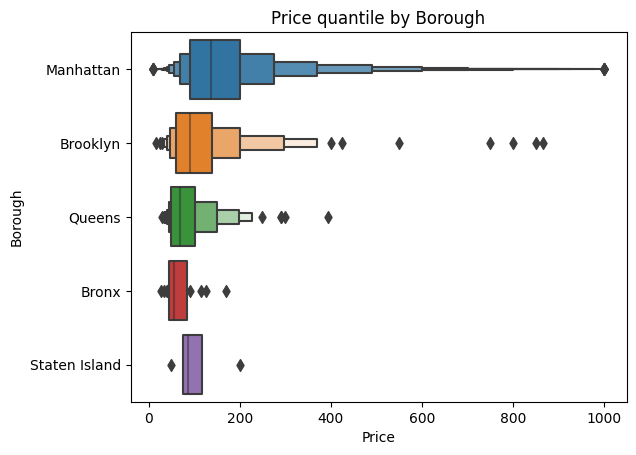

In [23]:
#analyze property types by boroughs
dfp = df3.groupby("Borough").mean()['Price']

print('Mean Price by Borough')
print(dfp.head())

plt.figure()
sns.boxenplot(data=df3,x=df3.Price, y='Borough')
plt.title('Price quantile by Borough')
plt.show()

In [24]:
df3.to_csv('nycbnb.csv',index=False)

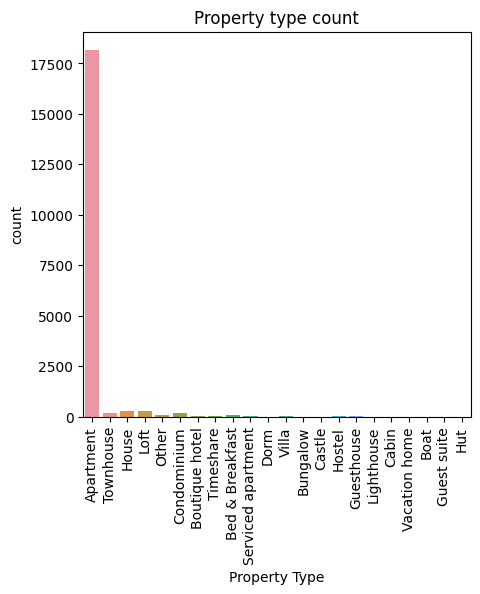

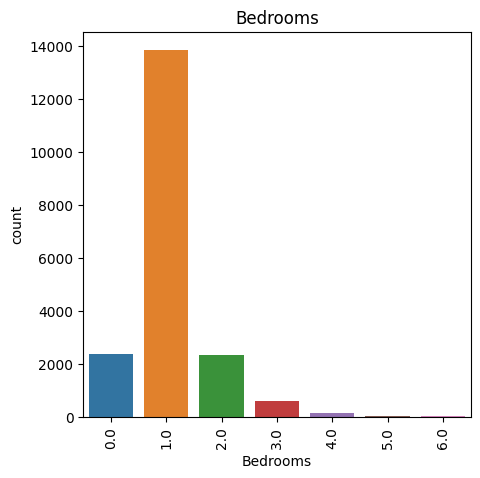

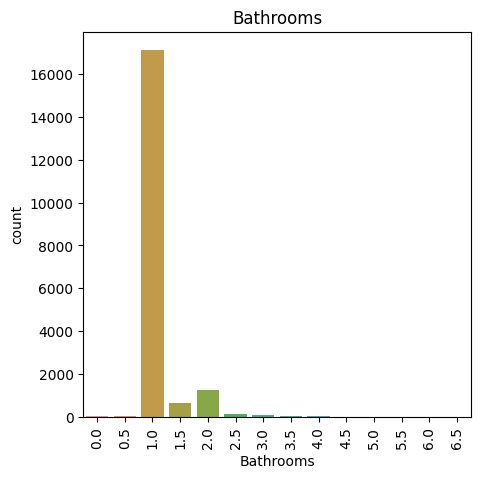

In [25]:
#analyze property types present in the dataset
plt.figure(figsize=(5,5))
sns.countplot(df3,x='Property Type')
plt.title('Property type count')
plt.xticks(rotation=90)
plt.xlabel('Property Type')

plt.figure(figsize=(5,5))
sns.countplot(df3,x='Bedrooms')
plt.title('Bedrooms')
plt.xticks(rotation=90)
plt.xlabel('Bedrooms')

plt.figure(figsize=(5,5))
sns.countplot(df3,x='Bathrooms')
plt.title('Bathrooms')
plt.xticks(rotation=90)
plt.xlabel('Bathrooms')


plt.show()

# Defining the scope of our analysis
Let us specifically analyze apartments in Manhattan listed on Airbnb

In [26]:

df4 = df3[df3['Property Type']=='Apartment']
df4 = df4[df4['Borough']=='Manhattan']
df4.head()

,Host Location,Host About,Host Response Time,Host Response Rate,City,Accommodates,Bathrooms,Bedrooms,Beds,Property Type,Cancellation Policy,Neighbourhood,Neighbourhood Cleansed,Availability 90,Availability 365,Price,Monthly Price,Borough
22788,United States,NaN,NaN,NaN,New York,4.0,1.0,0.0,1.0,Apartment,flexible,Financial District,Battery Park City,24.0,229.0,150.0,NaN,Manhattan
22789,"New York, New York, United States","I'm a Mom, Wife, Artist! :) \r\nMy husband and...",a few days or more,38.0,New York,3.0,1.0,1.0,1.0,Apartment,strict,Battery Park City,Battery Park City,55.0,260.0,145.0,5900.0,Manhattan
22790,"New York, New York, United States",NaN,NaN,NaN,New York,2.0,1.0,1.0,1.0,Apartment,strict,Battery Park City,Battery Park City,0.0,0.0,99.0,NaN,Manhattan
22791,US,"Originally from Tennessee, I moved to New York...",within a day,100.0,New York,2.0,1.0,1.0,1.0,Apartment,flexible,Tribeca,Battery Park City,89.0,364.0,250.0,NaN,Manhattan
22792,"New York, New York, United States",NaN,within an hour,100.0,New York,3.0,1.0,1.0,1.0,Apartment,strict,NaN,Battery Park City,43.0,312.0,175.0,NaN,Manhattan


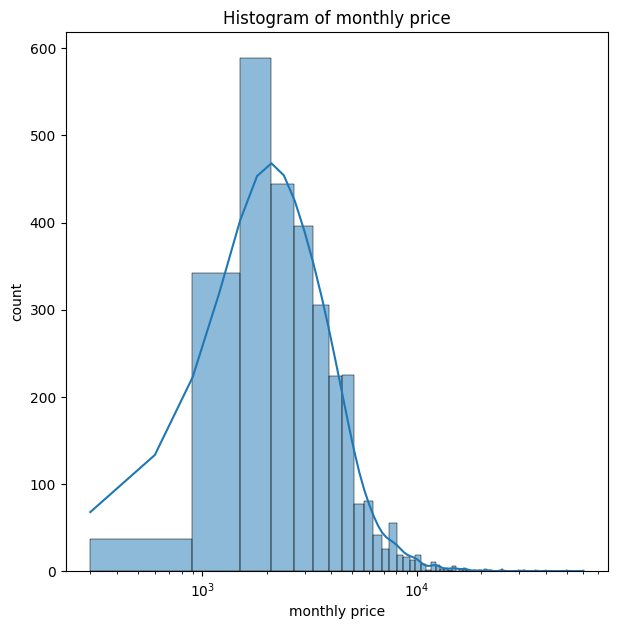

In [27]:
#Let's see how the prices are distributed for apartments in manhattan
plt.figure(figsize=(7,7))
sns.histplot(x=df4['Monthly Price'],kde=True,cbar=True,bins=100)
plt.xscale('log')
plt.title('Histogram of monthly price')
plt.xlabel("monthly price")
plt.ylabel("count")
plt.show()

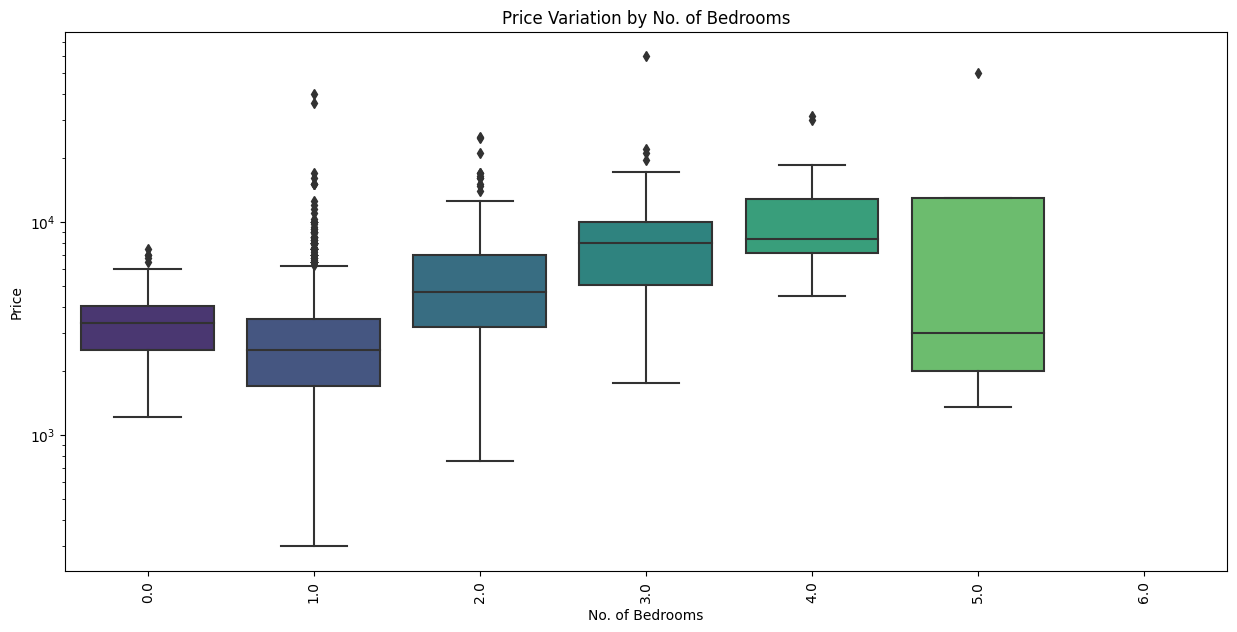

In [28]:
# Price vs neighbourhood type
plt.figure(figsize=(15,7))
sns.boxplot(data=df4, x='Bedrooms', y='Monthly Price', palette='viridis')
plt.title('Price Variation by No. of Bedrooms')
plt.yscale('log')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:

!pip install ipywidgets plotly

## Let us create an interactive widget that plots the price vs No. of bedrooms based on the neighbourhood we are in

In [70]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

#Looking at Price of listing vs Availability

# Dropdown for neighborhood selection
neighbourhood_dropdown = widgets.Dropdown(
    options=df4['Neighbourhood'].unique(),
    value=df4['Neighbourhood'].unique()[0],
    description='Neighbourhood:',
    disabled=False
)

# Slider for bedroom selection
bedroom_slider = widgets.IntSlider(
    value=1,
    min=df4['Bedrooms'].min(),
    max=df4['Bedrooms'].max(),
    step=1,
    description='Bedrooms:',
    continuous_update=False
)

def plot_graph(neighbourhood):

    filtered_df = df4[(df4['Neighbourhood'] == neighbourhood)]

    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    sns.boxplot(filtered_df,y='Price',x='Bedrooms')
    plt.title('Price Range vs Bedrooms')
    plt.show()


# Interactive widgets
widgets.interactive(plot_graph, neighbourhood=neighbourhood_dropdown, bedrooms=bedroom_slider)

interactive(children=(Dropdown(description='Neighbourhood:', options=('Financial District', 'Battery Park City…

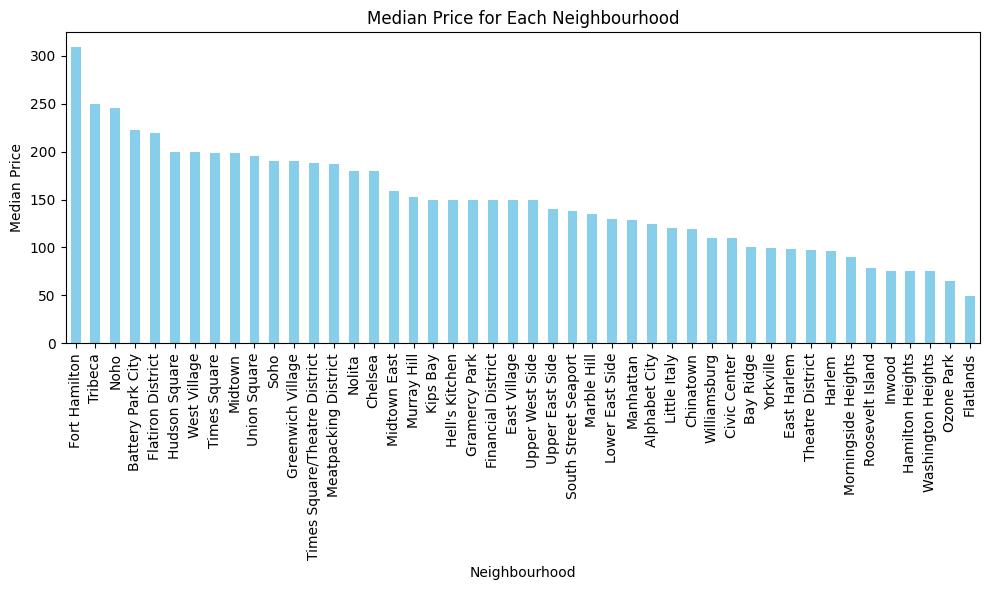

In [32]:
#Let us calculate the median price for each neighbourhood

median_price = df4.groupby('Neighbourhood')['Price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 6))
median_price.plot(kind='bar', color='skyblue')
plt.ylabel('Median Price')
plt.xlabel('Neighbourhood')
plt.title('Median Price for Each Neighbourhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Statistical difference in price and availability between 1 bedroom and 2 bedroom listings

<ipython-input-33-be8d0e624132>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1bed.dropna(inplace=True)
<ipython-input-33-be8d0e624132>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2bed.dropna(inplace=True)


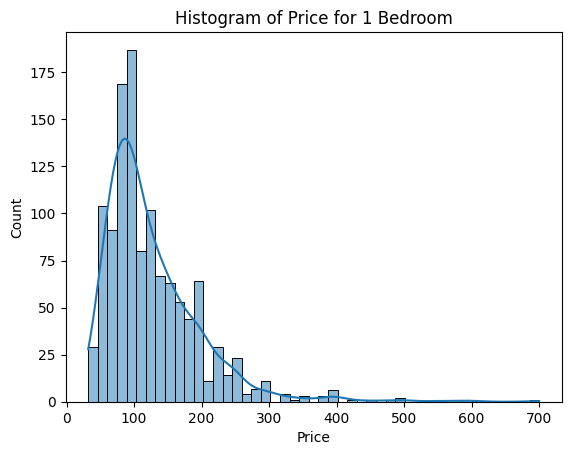

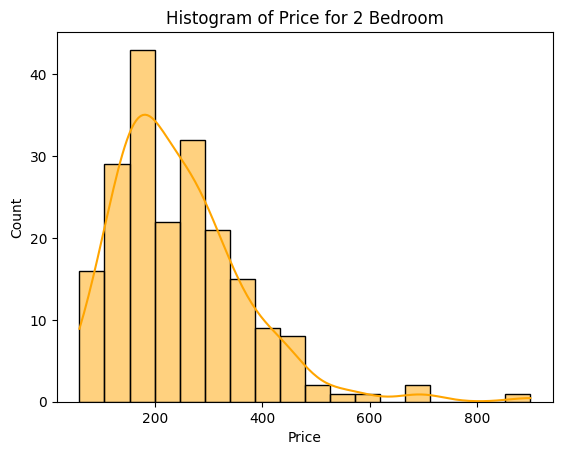

Data is not normally distributed
Data is not normally distributed


In [33]:
#let us see if there is a statistical difference in the mean Price for 1 bedroom vs 2 bedroom apartments

df_1bed = df4[df4['Bedrooms']==1]
df_2bed = df4[df4['Bedrooms']==2]

df_1bed.dropna(inplace=True)
df_2bed.dropna(inplace=True)

plt.figure()

#histogram of price

sns.histplot(x=df_1bed.Price,kde=True)
plt.title('Histogram of Price for 1 Bedroom')

plt.figure()
sns.histplot(x=df_2bed.Price,kde=True,color='orange')
plt.title('Histogram of Price for 2 Bedroom')

plt.show()

# Let us see if there is both data are normally distributed
from scipy.stats import shapiro
def shapiro_wilk(data):
  stat, p = shapiro(data)
  if p > 0.05:
      print(f'Data is normally distributed')
  else:
      print(f'Data is not normally distributed')

shapiro_wilk(df_1bed.Price)
shapiro_wilk(df_2bed.Price)


In [66]:
# based on the histogram and the shapiro wilk test
# we see that the data is not normally distributed

#Let us use the mannwhitneyu to see if there is significant differnece in the price. There should be

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_1bed.Price, df_2bed.Price, alternative='two-sided')
if p > 0.05:
  print('The mean prices of 1 bedroom and 2 bedroom are statistically same')
else:
  print('The mean prices of 1 bedroom and 2 bedroom are not statistically same')
print(f'P value of {p}')

stat, p = mannwhitneyu(df_1bed.Price, df_2bed.Price, alternative='less')
if p > 0.05:
  print('The mean prices of 1 bedroom is greater or equal to 2 bedroom')
else:
  print('The mean prices of 1 bedroom is  less than 2 bedroom')
print(f'P value of {p}')

The mean prices of 1 bedroom and 2 bedroom are not statistically same
P value of 2.607770912194068e-52
The mean prices of 1 bedroom is  less than 2 bedroom
P value of 1.303885456097034e-52


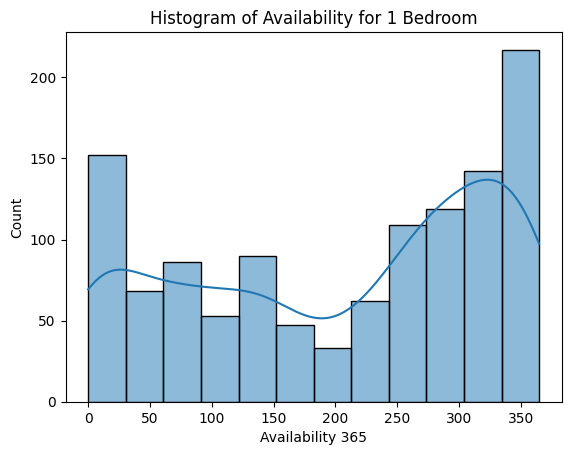

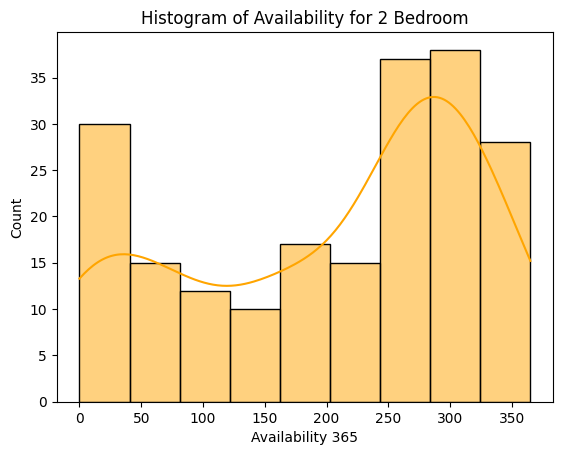

Data is not normally distributed
Data is not normally distributed


In [35]:
#histogram of availability

sns.histplot(x=df_1bed['Availability 365'],kde=True)
plt.title('Histogram of Availability for 1 Bedroom')

plt.figure()
sns.histplot(x=df_2bed['Availability 365'],kde=True,color='orange')
plt.title('Histogram of Availability for 2 Bedroom')

plt.show()

# Let us see if there is both data are normally distributed
from scipy.stats import shapiro
def shapiro_wilk(data):
  stat, p = shapiro(data)
  if p > 0.05:
      print(f'Data is normally distributed')
  else:
      print(f'Data is not normally distributed')

shapiro_wilk(df_1bed['Availability 365'])
shapiro_wilk(df_2bed['Availability 365'])

In [67]:
#Let us use the mannwhitneyu to see if there is significant differnece in the availability

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_1bed['Availability 365'], df_2bed['Availability 365'], alternative='two-sided')
if p > 0.05:
  print('The mean availability of 1 bedroom and 2 bedroom are statistically same')
else:
  print('The mean prices of 1 bedroom and 2 bedroom are not statistically same')
print(f'P value of {p}')


The mean availability of 1 bedroom and 2 bedroom are statistically same
P value of 0.5627927819618214


# Now we will analyze the impact a host has on their property listing

In [37]:
df4.columns

Index(['Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'City', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Property Type', 'Cancellation Policy', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Availability 90', 'Availability 365',
       'Price', 'Monthly Price', 'Borough'],
      dtype='object')

We will attribute the following feature to Host personality:

'Host About', 'Host Response Time',
'Host Response Rate','Cancellation Policy'

In [38]:
#Let's see if the host has given a self introduction in "About" or not
df5 = df4.copy()

def host_about(x):
  if x is np.nan:
    return 0
  else:
    return 1

df5["Host About"] = df5["Host About"].apply(host_about)
df5.head()

,Host Location,Host About,Host Response Time,Host Response Rate,City,Accommodates,Bathrooms,Bedrooms,Beds,Property Type,Cancellation Policy,Neighbourhood,Neighbourhood Cleansed,Availability 90,Availability 365,Price,Monthly Price,Borough
22788,United States,0,NaN,NaN,New York,4.0,1.0,0.0,1.0,Apartment,flexible,Financial District,Battery Park City,24.0,229.0,150.0,NaN,Manhattan
22789,"New York, New York, United States",1,a few days or more,38.0,New York,3.0,1.0,1.0,1.0,Apartment,strict,Battery Park City,Battery Park City,55.0,260.0,145.0,5900.0,Manhattan
22790,"New York, New York, United States",0,NaN,NaN,New York,2.0,1.0,1.0,1.0,Apartment,strict,Battery Park City,Battery Park City,0.0,0.0,99.0,NaN,Manhattan
22791,US,1,within a day,100.0,New York,2.0,1.0,1.0,1.0,Apartment,flexible,Tribeca,Battery Park City,89.0,364.0,250.0,NaN,Manhattan
22792,"New York, New York, United States",0,within an hour,100.0,New York,3.0,1.0,1.0,1.0,Apartment,strict,NaN,Battery Park City,43.0,312.0,175.0,NaN,Manhattan


In [39]:
print(df5["Host Response Time"].unique())

#As in this data, there is a gradatation(within an hour < within a few hours < ...)
# we will stick to label encoding

ordinal_map = {np.nan:0, 'a few days or more':1, 'within a day':2,'within a few hours':3,'within an hour':4}

df5["Host Response Time"] = df5["Host Response Time"].map(ordinal_map)

#new values:
print('\n mapped response time')
print(df5["Host Response Time"].unique())

[nan 'a few days or more' 'within a day' 'within an hour'
 'within a few hours']

 mapped response time
[0 1 2 4 3]


In [40]:
#Convert response rate of Nan to 0
df5['Host Response Rate'].fillna(0,inplace=True)


In [50]:
#fill price null values
# Use the transform function to broadcast the group means to the original dataframe.
df5['Price'].fillna(df5.groupby('Bedrooms')['Price'].transform('mean'), inplace=True)

In [41]:
print(df5['Cancellation Policy'].unique())

#again we go with label encoding for ordinal data

ordinal_map = {'super_strict_30':1, 'strict':2,'moderate':3,'flexible':4}

df5['Cancellation Policy'] = df5['Cancellation Policy'].map(ordinal_map)

#new values:
print('\n mapped cancellation policy')
print(df5['Cancellation Policy'].unique())

['flexible' 'strict' 'moderate' 'super_strict_30']

 mapped cancellation policy
[4 2 3 1]


<Axes: xlabel='Host Response Time', ylabel='Host Response Rate'>

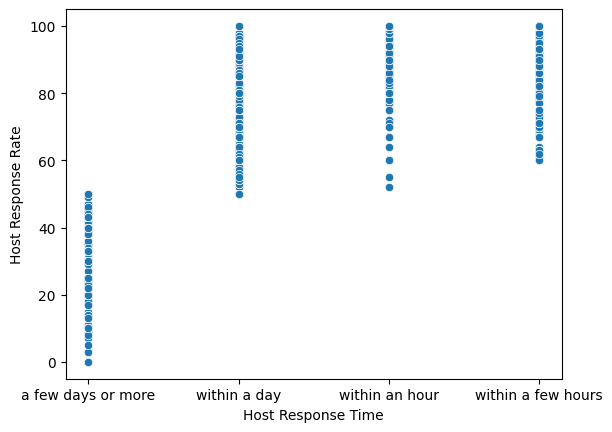

In [42]:
## Let's see if there is a relationship between the response time and response rate

df_host = df4[["Host About",'Host Response Rate','Cancellation Policy',"Host Response Time"]]
plt.figure()
sns.scatterplot(data=df_host, x='Host Response Time',y='Host Response Rate')
# plt.figure()
# sns.scatterplot(data=df_host, x='Host Response Time',y='Host Response Rate')

Hosts who usually have a better response rate if they respond within a day. Maybe the AirBnB can nudge the hosts to boost up response rate

Availability for next 365 days
Cancellation Policy
flexible            77.556458
moderate           107.763444
strict             153.592248
super_strict_30    222.000000
Name: Availability 365, dtype: float64
Availability for next 90 days
Cancellation Policy
flexible           21.000923
moderate           25.293108
strict             32.361923
super_strict_30    52.000000
Name: Availability 90, dtype: float64


<ipython-input-43-e1f4d2d814d4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df4.groupby('Cancellation Policy').mean()['Availability 365'])
<ipython-input-43-e1f4d2d814d4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df4.groupby('Cancellation Policy').mean()['Availability 90'])


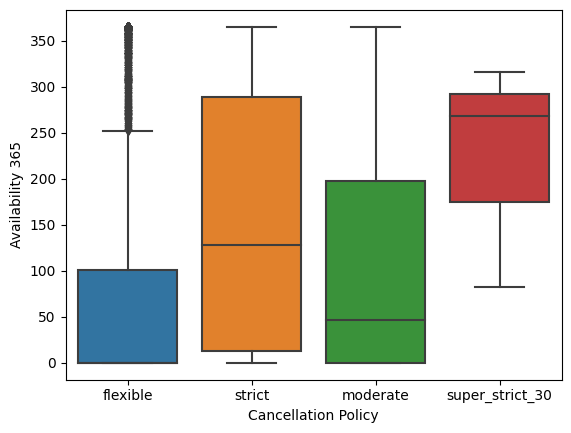

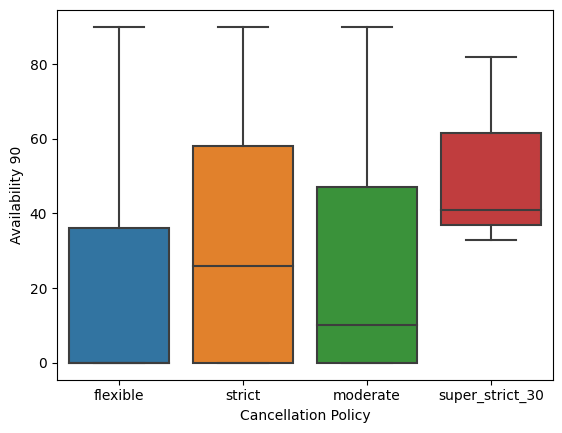

In [43]:
# How does the availabilty vary based on the cancellation policy
print('Availability for next 365 days')
print(df4.groupby('Cancellation Policy').mean()['Availability 365'])
print('Availability for next 90 days')
print(df4.groupby('Cancellation Policy').mean()['Availability 90'])
plt.figure()
sns.boxplot(data=df4,y='Availability 365',x='Cancellation Policy')
plt.figure()
sns.boxplot(data=df4,y='Availability 90',x='Cancellation Policy')
plt.show()

We see similar trends for how the availability for the next 90 and 365 days is affected by the cancellation policy. The more strict the policy is, the less booked it it.

Availability for next 365 days
Host Response Time
a few days or more    197.757377
within a day          157.993108
within a few hours    161.308012
within an hour        158.533267
Name: Availability 365, dtype: float64
Availability for next 90 days
Host Response Time
a few days or more    53.434426
within a day          37.400758
within a few hours    35.684570
within an hour        33.952673
Name: Availability 90, dtype: float64


<ipython-input-44-9d170b0e9d35>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df4.groupby('Host Response Time').mean()['Availability 365'])
<ipython-input-44-9d170b0e9d35>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df4.groupby('Host Response Time').mean()['Availability 90'])


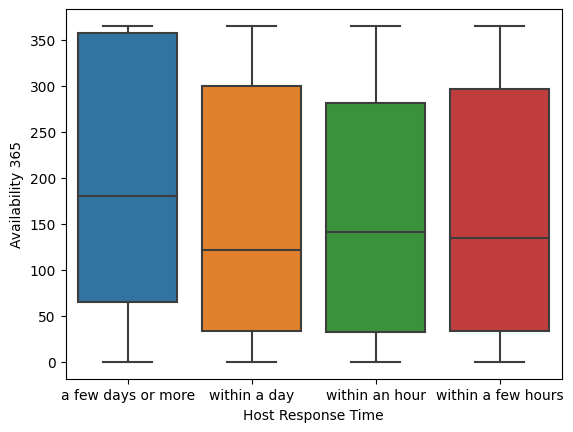

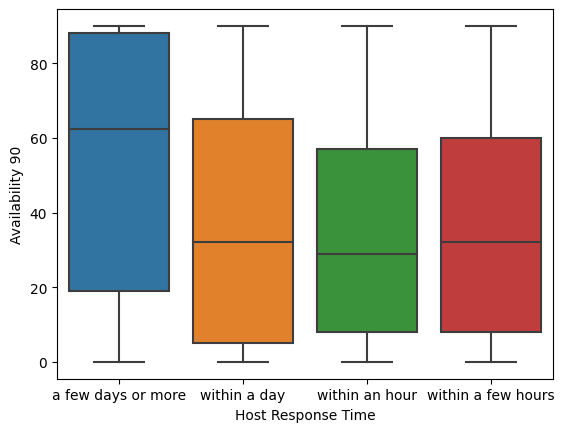

In [44]:
# How does Availability change based on the the Host response ratee
print('Availability for next 365 days')
print(df4.groupby('Host Response Time').mean()['Availability 365'])
print('Availability for next 90 days')
print(df4.groupby('Host Response Time').mean()['Availability 90'])
plt.figure()
sns.boxplot(data=df4,y='Availability 365',x='Host Response Time')
plt.figure()
sns.boxplot(data=df4,y='Availability 90',x='Host Response Time')
plt.show()

Again we see that if the host takes more that a day to respond, it erodes trust which may lead to the listing being underbooked

Availability for next 365 days
Host About
0    100.202726
1    134.680493
Name: Availability 365, dtype: float64
Availability for next 90 days
Host About
0    25.111756
1    28.940266
Name: Availability 90, dtype: float64


<ipython-input-46-3746039377e5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df5.groupby('Host About').mean()['Availability 365'])
<ipython-input-46-3746039377e5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df5.groupby('Host About').mean()['Availability 90'])


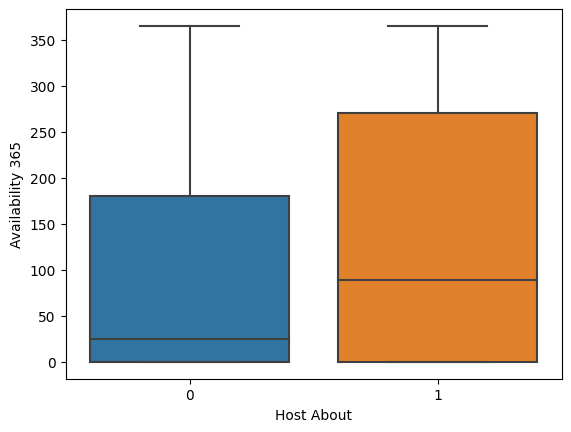

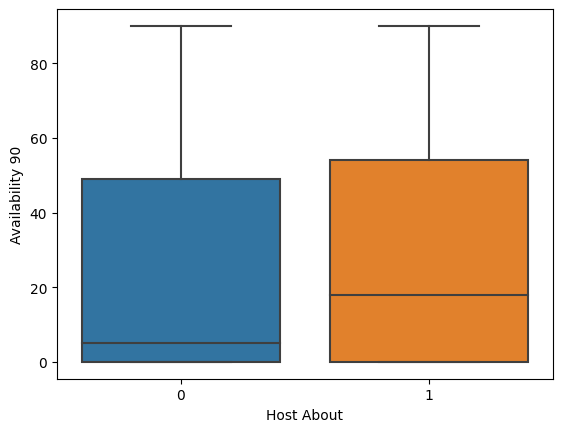

In [46]:
# How does Availability change based on the the Host About
print('Availability for next 365 days')
print(df5.groupby('Host About').mean()['Availability 365'])
print('Availability for next 90 days')
print(df5.groupby('Host About').mean()['Availability 90'])
plt.figure()
sns.boxplot(data=df5,y='Availability 365',x='Host About')
plt.figure()
sns.boxplot(data=df5,y='Availability 90',x='Host About')
plt.show()

Surprisingly, the host not publishing an About post, does not detrimentally affect the listing availabilty.

# Is Price correlated to the Availabilty ?

In [65]:
# How does Availability change based on the the Host About
corr = df5['Price'].corr(df5['Availability 365'])
print(f'Correlation between Price and Availabilty is {corr}')
print('\n  This shows that in NYC apartments, price and the Availabilty are not correlated')

Correlation between Price and Availabilty is 0.10225896367588287

  This shows that in NYC apartments, price and the Availabilty are not correlated
